# Student Performance Prediction - Explorative data analysis

**Goals:**
* Performing univariate, bivariate Analysis of each feature of data.
* understanding the relationships between the features using different matplotlib and seaborn plots.
* understanding distributions and check whether outliers are present in features.
* Getting the correlation between the features.
* Removing null values.
* Performing above EDA on raw and cleaned/processed data.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## EDA on raw data

In [60]:
students = pd.read_csv("../data/raw/StudentPerformanceFactors.csv")
students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [61]:
students.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [62]:
students = students.dropna()

In [63]:
students[students['Tutoring_Sessions']==8].count()

Hours_Studied                 1
Attendance                    1
Parental_Involvement          1
Access_to_Resources           1
Extracurricular_Activities    1
Sleep_Hours                   1
Previous_Scores               1
Motivation_Level              1
Internet_Access               1
Tutoring_Sessions             1
Family_Income                 1
Teacher_Quality               1
School_Type                   1
Peer_Influence                1
Physical_Activity             1
Learning_Disabilities         1
Parental_Education_Level      1
Distance_from_Home            1
Gender                        1
Exam_Score                    1
dtype: int64

In [64]:
students.dtypes.value_counts()

object    13
int64      7
Name: count, dtype: int64

In [65]:
int_cols = students.select_dtypes(include="int64").columns
str_cols = students.select_dtypes(include="object").columns

In [66]:
print("Integer columns\n", list(int_cols))
print("String columns\n", list(str_cols))

Integer columns
 ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
String columns
 ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


#### Histogram plot to analyze the distribution of features.

In [67]:
plt.style.use("ggplot")

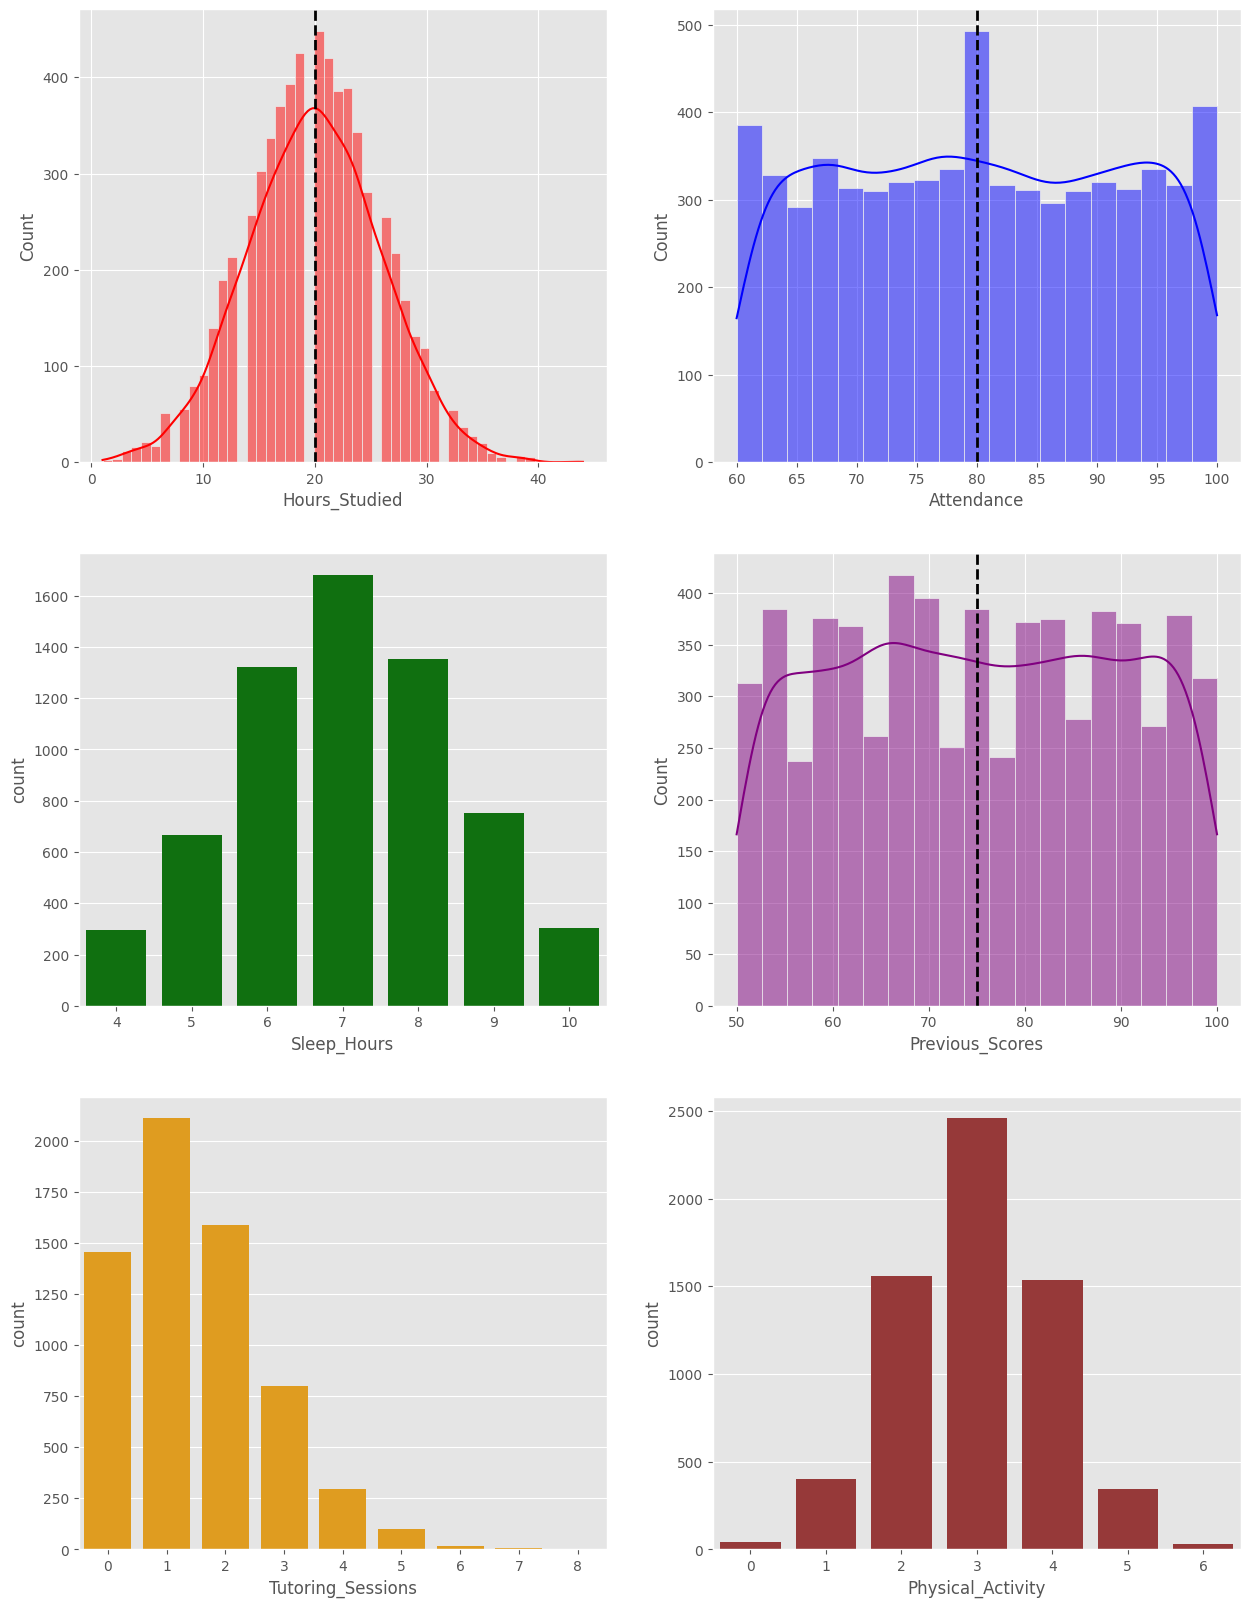

In [68]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(3, 2, figsize=(15, 20))

hours_studied_mean = students['Hours_Studied'].mean()
sns.histplot(students['Hours_Studied'], ax=ax1, color='red', kde=True)
ax1.axvline(hours_studied_mean, color='black', linestyle='--', linewidth=2)

attendance_mean = students['Attendance'].mean()
sns.histplot(students['Attendance'], ax=ax2, color='blue', kde=True)
ax2.axvline(attendance_mean, color='black', linestyle='--', linewidth=2)

sns.countplot(x='Sleep_Hours', data=students, ax=ax3, color='green')

previous_scores_mean = students['Previous_Scores'].mean()
sns.histplot(students['Previous_Scores'], ax=ax4, color='purple', kde=True)
ax4.axvline(previous_scores_mean, color='black', linestyle='--', linewidth=2)

sns.countplot(
    x='Tutoring_Sessions',
    data=students,
    ax=ax5,
    color='orange'
)

sns.countplot(
    x='Physical_Activity',
    data=students,
    ax=ax6,
    color='brown'
)

plt.savefig("../assets/plots/distributions-of-numerical-columns.png", dpi=300, bbox_inches="tight")

**Interpretations from above plots**
1. Hours_Studied shows a normal distributions.
2. Attendance and previous scores doesnt show the normal distribution.
3. Maximum no of students sleep for 7 hours.
4. Maximum no of students does 3 physical activities.
5. Maximum no of students take only 1 tutoring sessions

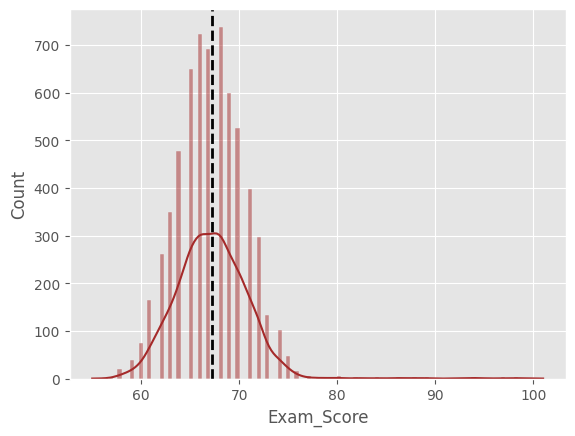

In [69]:
exam_score_mean = students['Exam_Score'].mean()
sns.histplot(students['Exam_Score'], color='brown', kde=True)
plt.axvline(exam_score_mean, color='black', linestyle='--', linewidth=2)
plt.savefig("../assets/plots/distributions-of-exam-scores.png", dpi=300, bbox_inches="tight")

<Axes: ylabel='Physical_Activity'>

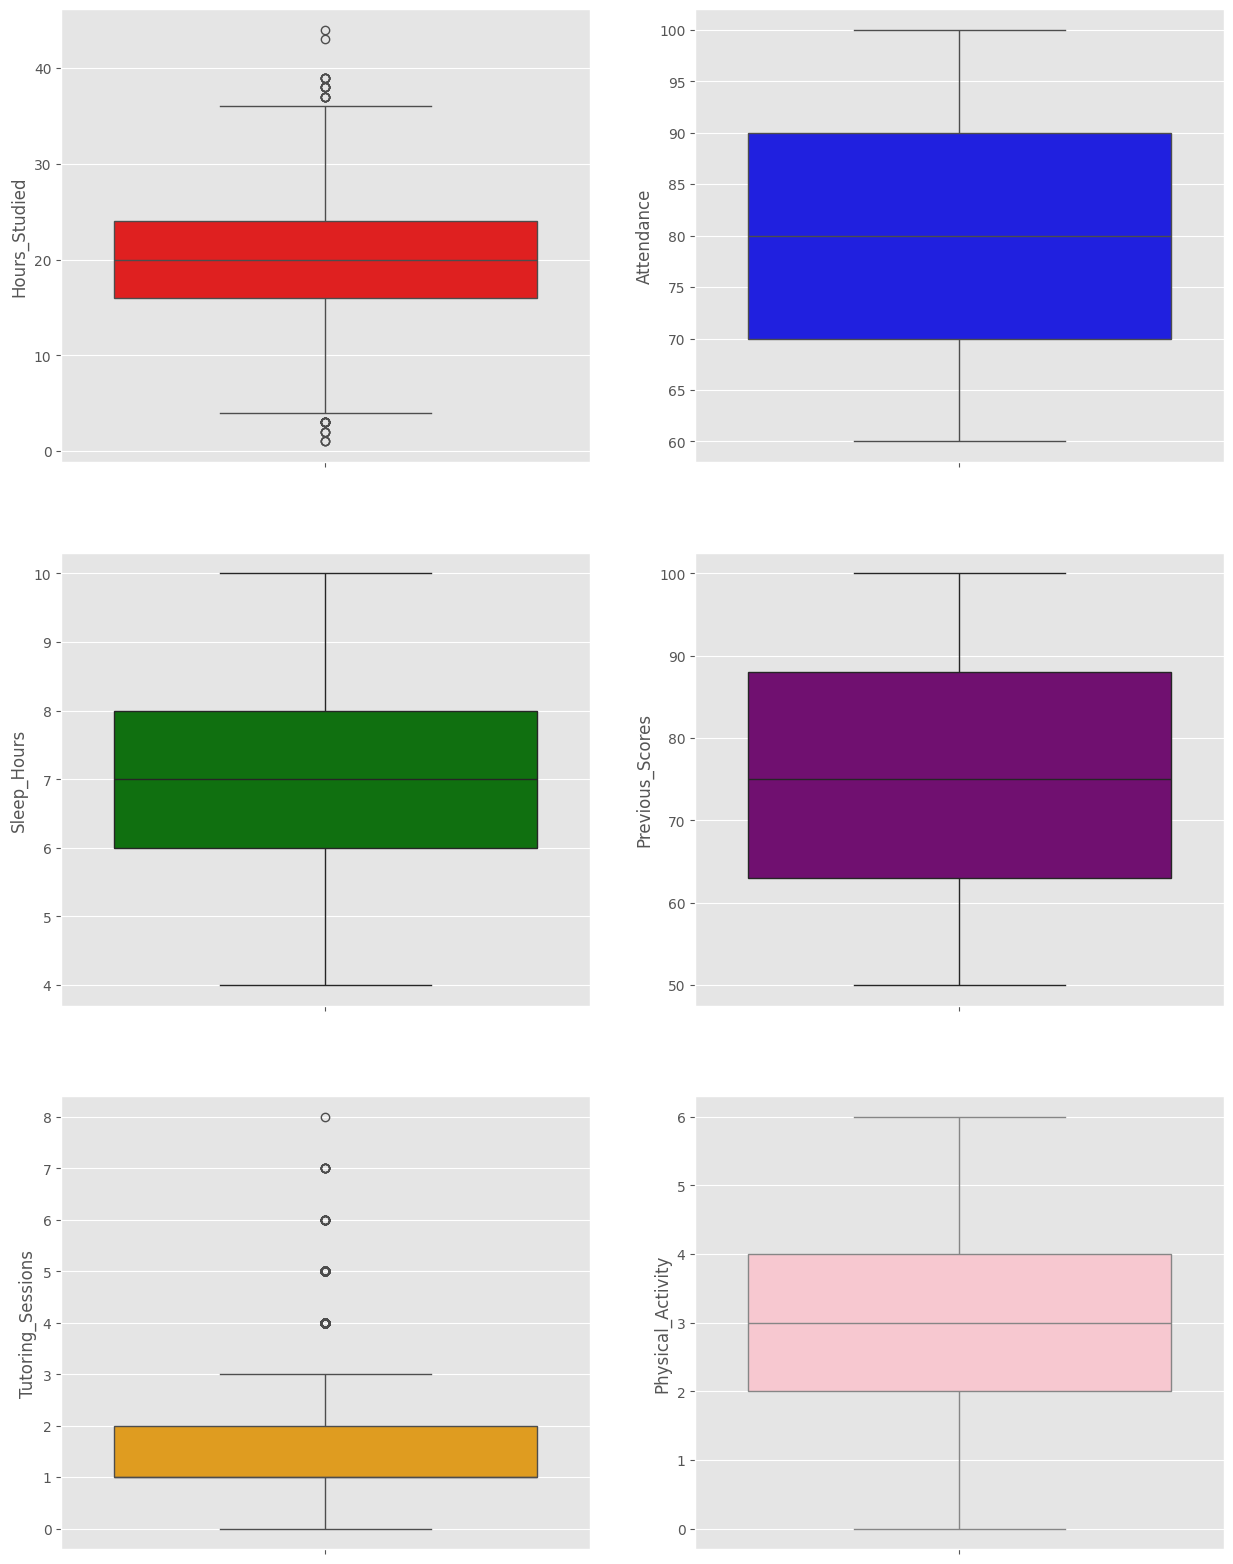

In [70]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 20))

sns.boxplot(students['Hours_Studied'], ax=ax1, color='red')
sns.boxplot(students['Attendance'], ax=ax2, color='blue')
sns.boxplot(students['Sleep_Hours'], ax=ax3, color='green')
sns.boxplot(students['Previous_Scores'], ax=ax4, color='purple')
sns.boxplot(students['Tutoring_Sessions'], ax=ax5, color='orange')
sns.boxplot(students['Physical_Activity'], ax=ax6, color='pink')

In [71]:
HSpercentile25 = students['Hours_Studied'].quantile(0.25)
HSpercentile75 = students['Hours_Studied'].quantile(0.75)
iqr = HSpercentile75 - HSpercentile25

upper_range = HSpercentile75 + 1.5*iqr
lower_range = HSpercentile25 - 1.5*iqr

students[(students['Hours_Studied']>upper_range) | (students['Hours_Studied']<lower_range)].shape[0]

40

**There are 43 outliers in Hours studies**

In [72]:
TSpercentile25 = students['Tutoring_Sessions'].quantile(0.25)
TSpercentile75 = students['Tutoring_Sessions'].quantile(0.75)
iqr = TSpercentile75 - TSpercentile25

upper_range = TSpercentile75 + 1.5*iqr
lower_range = TSpercentile25 - 1.5*iqr

students[(students['Tutoring_Sessions']>upper_range) | (students['Tutoring_Sessions']<lower_range)].shape[0]

423

**There are 430 outliers in tutoring sessions.**

**Now, Let's try to answer some of the questions**
1. How no of sleep hours is affecting students performance?
2. How physical activity is affecting students performance?
3. How tutoring sessions and hours studied contributing to students performance?
4. How does the access to resources, internet access, motivation level affecting the students performance?
5. How does the peer influence, parental involvement, distance from home is affecting students performance?

I will try to figure out the relationships and answer the questions through correlation matrix, bar plot and scatter plot.

### Correlation Matrix

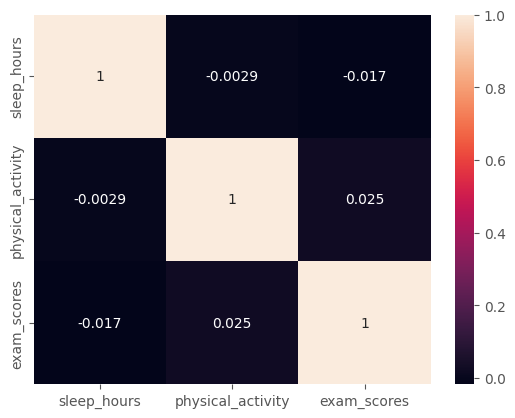

In [73]:
df1 = pd.DataFrame({
    "sleep_hours" : students['Sleep_Hours'],
    "physical_activity": students['Physical_Activity'],
    "exam_scores": students['Exam_Score']
})
corr1 = df1.corr()
sns.heatmap(corr1, annot=True)
plt.savefig("../assets/plots/correlation_matrix1.png", dpi=300, bbox_inches="tight")

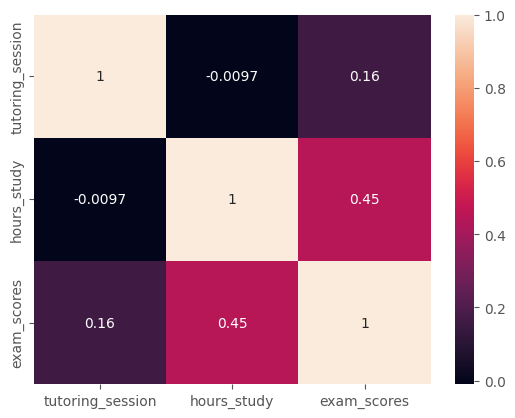

In [74]:
df2 = pd.DataFrame({
    "tutoring_session" : students['Tutoring_Sessions'],
    "hours_study": students['Hours_Studied'],
    "exam_scores": students['Exam_Score']
})
corr2 = df2.corr()
sns.heatmap(corr2, annot=True)
plt.savefig("../assets/plots/correlation_matrix2.png", dpi=300, bbox_inches="tight")

In [75]:
encoder = LabelEncoder()
str_cols = students.select_dtypes(include="object").columns

for i in str_cols:
    students[f'{i}_encoded'] = encoder.fit_transform(students[i])

students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Motivation_Level_encoded,Internet_Access_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
0,23,84,Low,High,No,7,73,Low,Yes,0,...,1,1,1,2,1,2,0,1,2,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,1,1,2,2,1,0,0,0,1,0
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,2,1,2,2,1,1,0,2,2,1
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,2,1,2,2,1,0,0,1,1,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,2,1,2,0,1,1,0,0,2,0


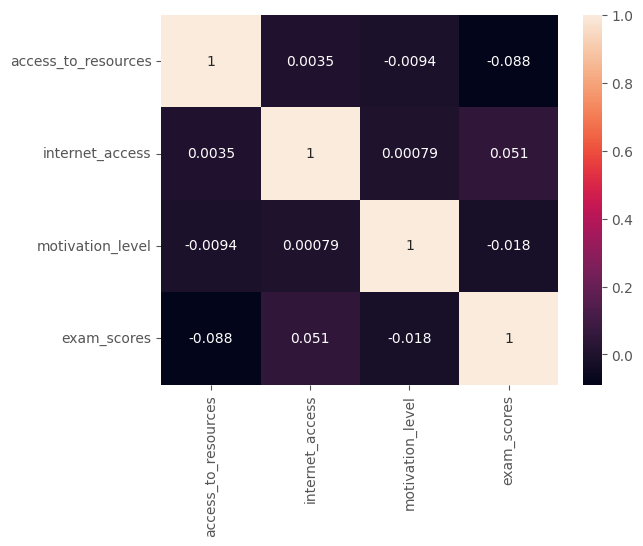

In [76]:
df3 = pd.DataFrame({
    "access_to_resources" : students['Access_to_Resources_encoded'],
    "internet_access": students['Internet_Access_encoded'],
    "motivation_level": students["Motivation_Level_encoded"],
    "exam_scores": students['Exam_Score']
})
corr3 = df3.corr()
sns.heatmap(corr3, annot=True)
plt.savefig("../assets/plots/correlation_matrix3.png", dpi=300, bbox_inches="tight")

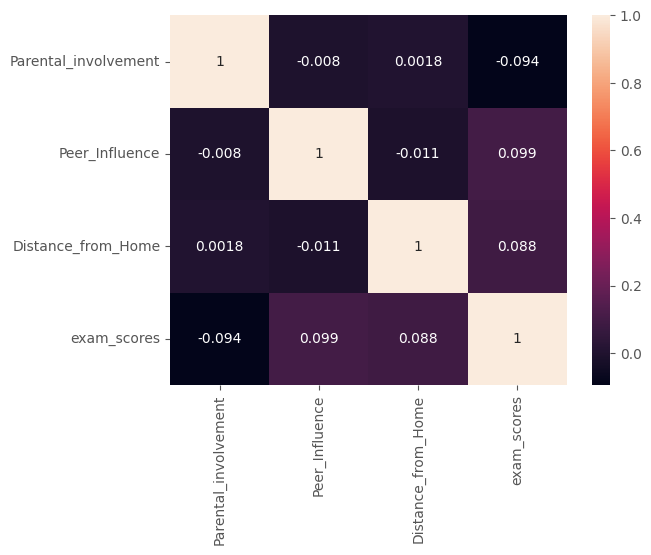

In [77]:
df4 = pd.DataFrame({
    "Parental_involvement" : students['Parental_Involvement_encoded'],
    "Peer_Influence": students['Peer_Influence_encoded'],
    "Distance_from_Home": students["Distance_from_Home_encoded"],
    "exam_scores": students['Exam_Score']
})
corr4 = df4.corr()
sns.heatmap(corr4, annot=True)
plt.savefig("../assets/plots/correlation_matrix4.png", dpi=300, bbox_inches="tight")

In [78]:
students.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Parental_Involvement_encoded',
       'Access_to_Resources_encoded', 'Extracurricular_Activities_encoded',
       'Motivation_Level_encoded', 'Internet_Access_encoded',
       'Family_Income_encoded', 'Teacher_Quality_encoded',
       'School_Type_encoded', 'Peer_Influence_encoded',
       'Learning_Disabilities_encoded', 'Parental_Education_Level_encoded',
       'Distance_from_Home_encoded', 'Gender_encoded'],
      dtype='object')

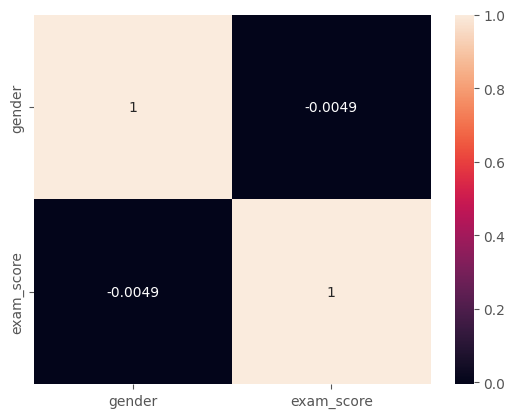

In [79]:
df5 = pd.DataFrame({
    'gender':students['Gender_encoded'],
    'exam_score': students['Exam_Score']
})

corr5 = df5.corr()
sns.heatmap(corr5, annot=True)
plt.savefig("../assets/plots/correlation_matrix5.png", dpi=300, bbox_inches="tight")

**Answers for above questions after the exploration**
#### How do sleep hours affect student performance?
- Correlation analysis shows a **weak to moderate positive relationship** between **Sleep_Hours** and **Exam_Score**.
- Students who sleep adequately tend to perform slightly better, but sleep alone is not a strong predictor.


#### How does physical activity affect student performance?
- **Physical_Activity** has a **low positive correlation** with exam scores.
- Moderate physical activity may support performance indirectly (better health, focus), but it is not a dominant factor.


#### How do tutoring sessions and hours studied contribute to performance?
- **Hours_Studied** shows a **strong positive correlation** with **Exam_Score**, making it one of the most important predictors.
- **Tutoring_Sessions** also positively impacts performance, but the effect is **weaker than self-study hours**.
- This suggests **consistent self-study is more impactful than excessive tutoring**.


#### How do access to resources, internet access, and motivation affect performance?
- **Access_to_Resources** and **Internet_Access** show a **positive relationship** with exam scores.
- **Motivation_Level** exhibits a **noticeable positive correlation**, highlighting its importance in academic success.
- Students with better resources and higher motivation generally perform better.


#### How do family and social factors affect performance?
- **Parental_Involvement** shows a **positive influence** on exam scores.
- **Peer_Influence** indicates that students with positive peer groups tend to score higher.
- **Distance_from_Home** has a slight negative impact, suggesting long commutes may affect performance.


### Categorical Features analysis

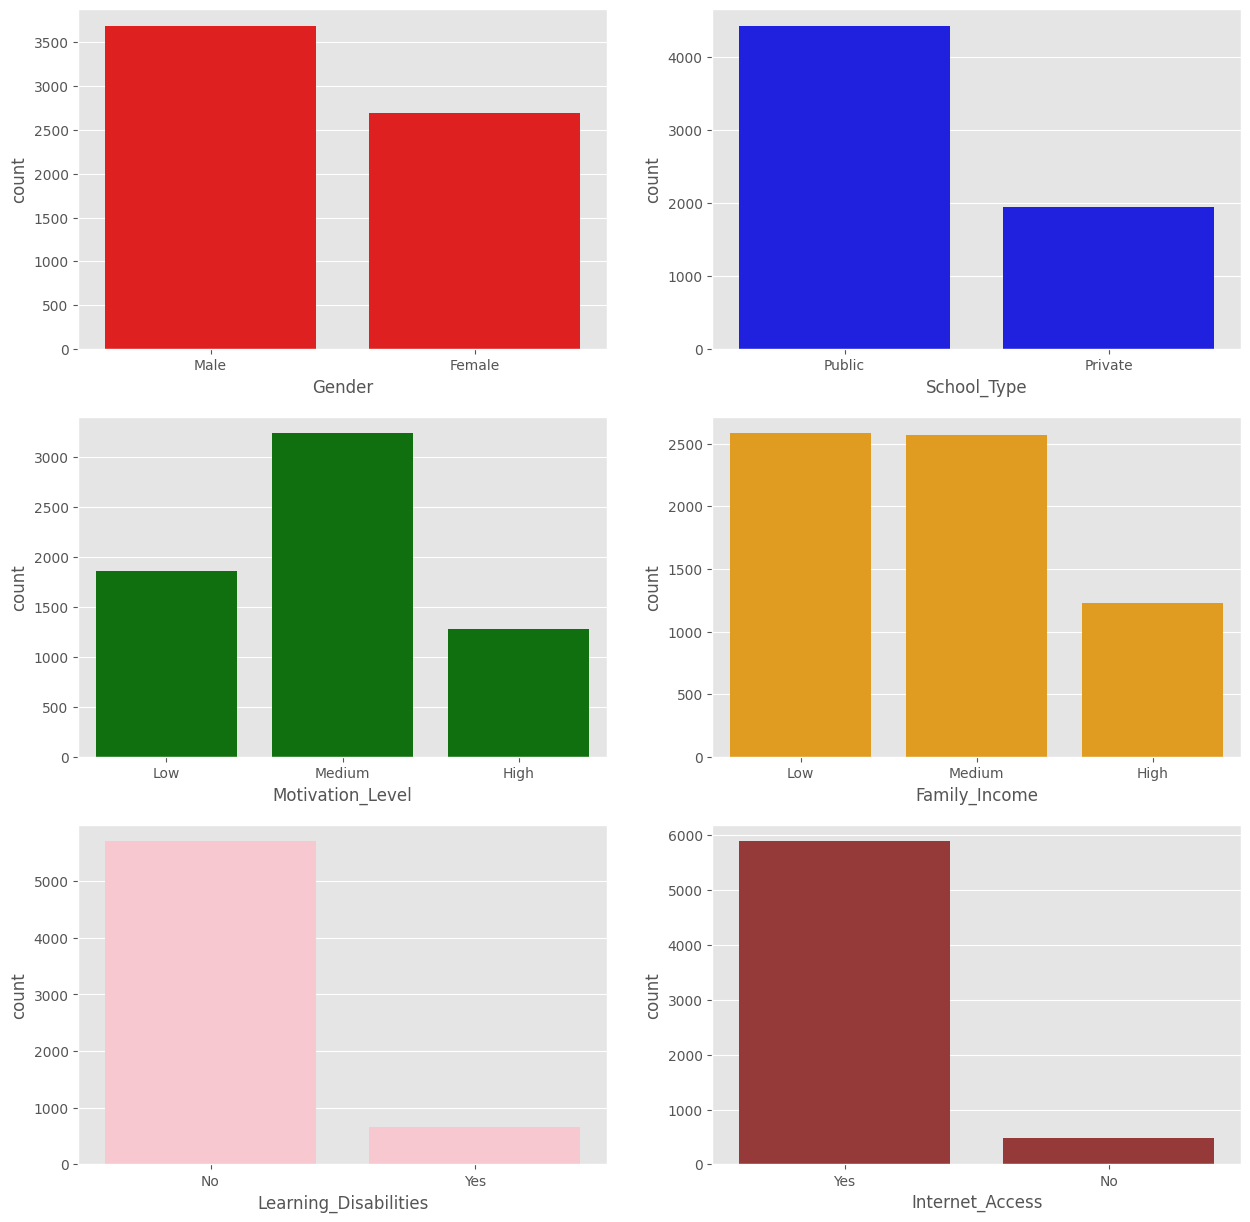

In [80]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(x=students['Gender'], ax=ax1, color='red', legend='auto')
sns.countplot(x=students['School_Type'], ax=ax2, color='blue', legend='auto')
sns.countplot(x=students['Motivation_Level'], ax=ax3, color='green', legend='auto')
sns.countplot(x=students['Family_Income'], ax=ax4, color='orange', legend='auto')
sns.countplot(x=students['Learning_Disabilities'], ax=ax5, color='pink', legend='auto')
sns.countplot(x=students['Internet_Access'], ax=ax6, color='brown', legend='auto')
plt.savefig("../assets/plots/analysis-of-categorical-features.png", dpi=300, bbox_inches="tight")

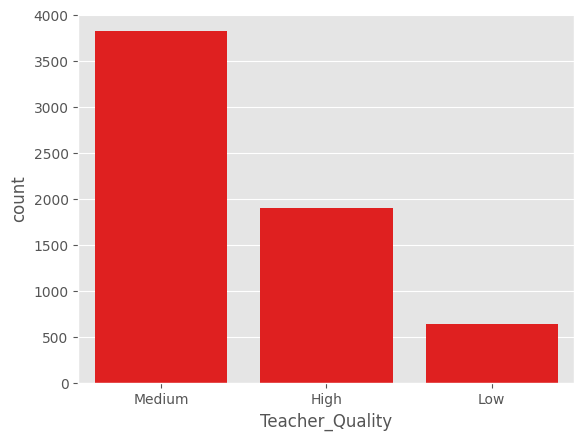

In [81]:
sns.countplot(x='Teacher_Quality', data=students, color='red')
plt.savefig("../assets/plots/analysis-of-teacher-quality.png", dpi=300, bbox_inches="tight")

### Relationship between Numerical Features and Numerical Features

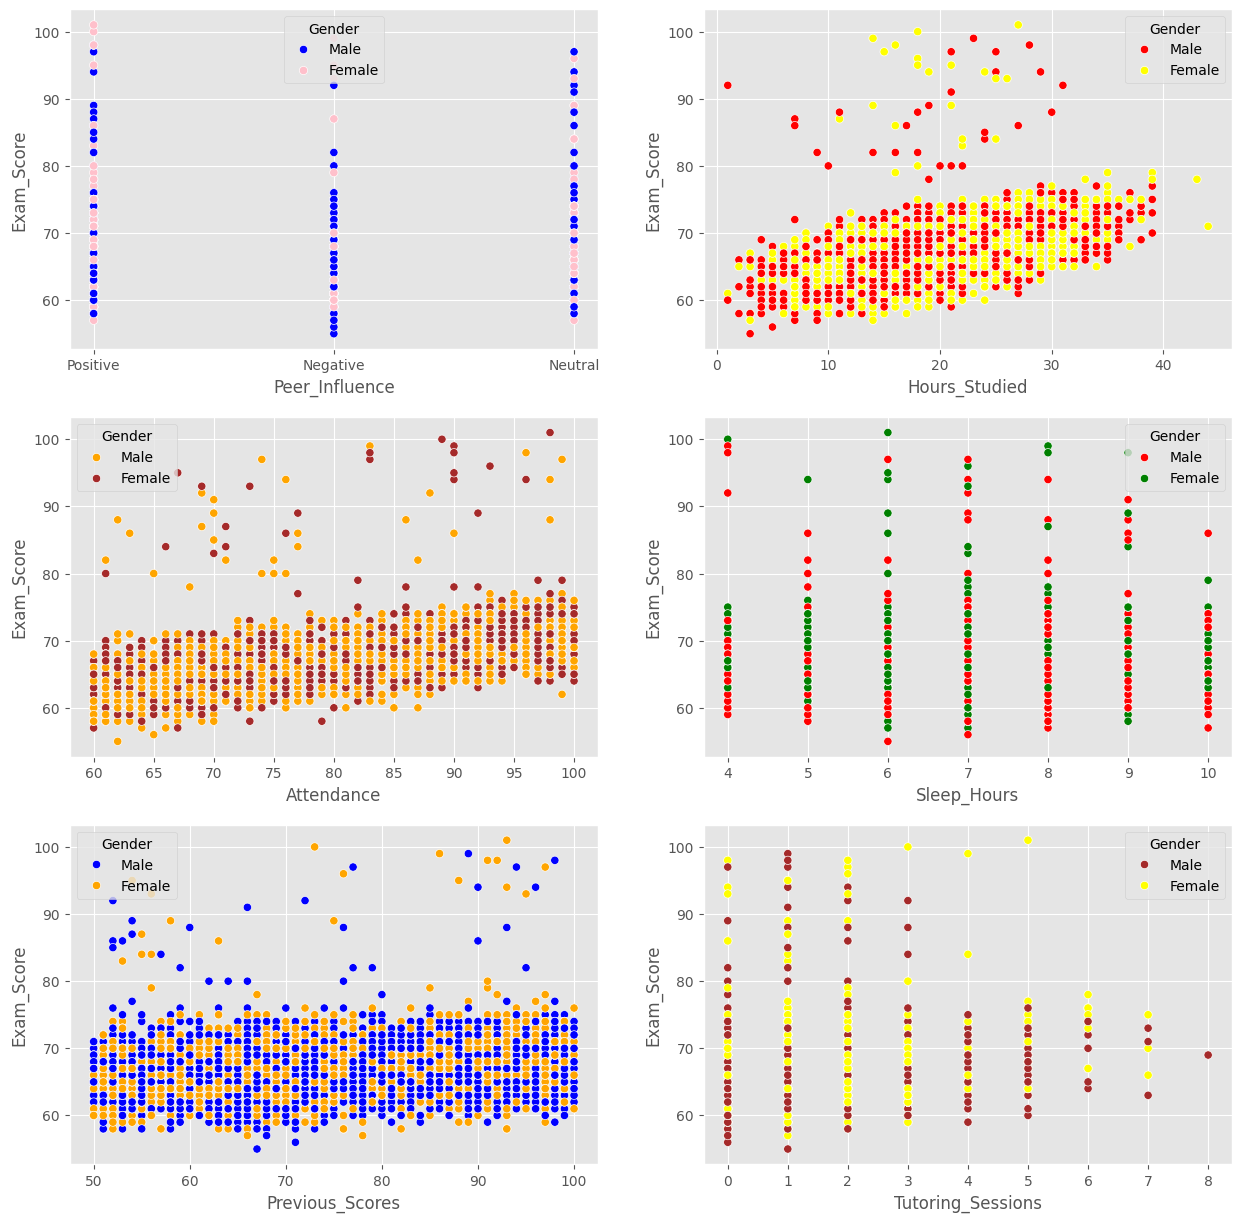

In [82]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))

sns.scatterplot(x='Peer_Influence', y='Exam_Score', hue='Gender', data=students, ax=ax1, palette=['blue', 'pink'])
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=students, ax=ax2, palette=['red', 'yellow'])
sns.scatterplot(x='Attendance', y='Exam_Score', hue='Gender', data=students, ax=ax3, palette=['orange', 'brown'])
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', hue='Gender', data=students, ax=ax4, palette=['red', 'green'])
sns.scatterplot(x='Previous_Scores', y='Exam_Score', hue='Gender', data=students, ax=ax5, palette=['blue', 'orange'])
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', hue='Gender', data=students, ax=ax6, palette=['brown', 'yellow'])
plt.savefig("../assets/plots/relationships-between-numerical-numerical-features.png", dpi=300, bbox_inches="tight")

### Relationship between Categorical Features and Numerical Features

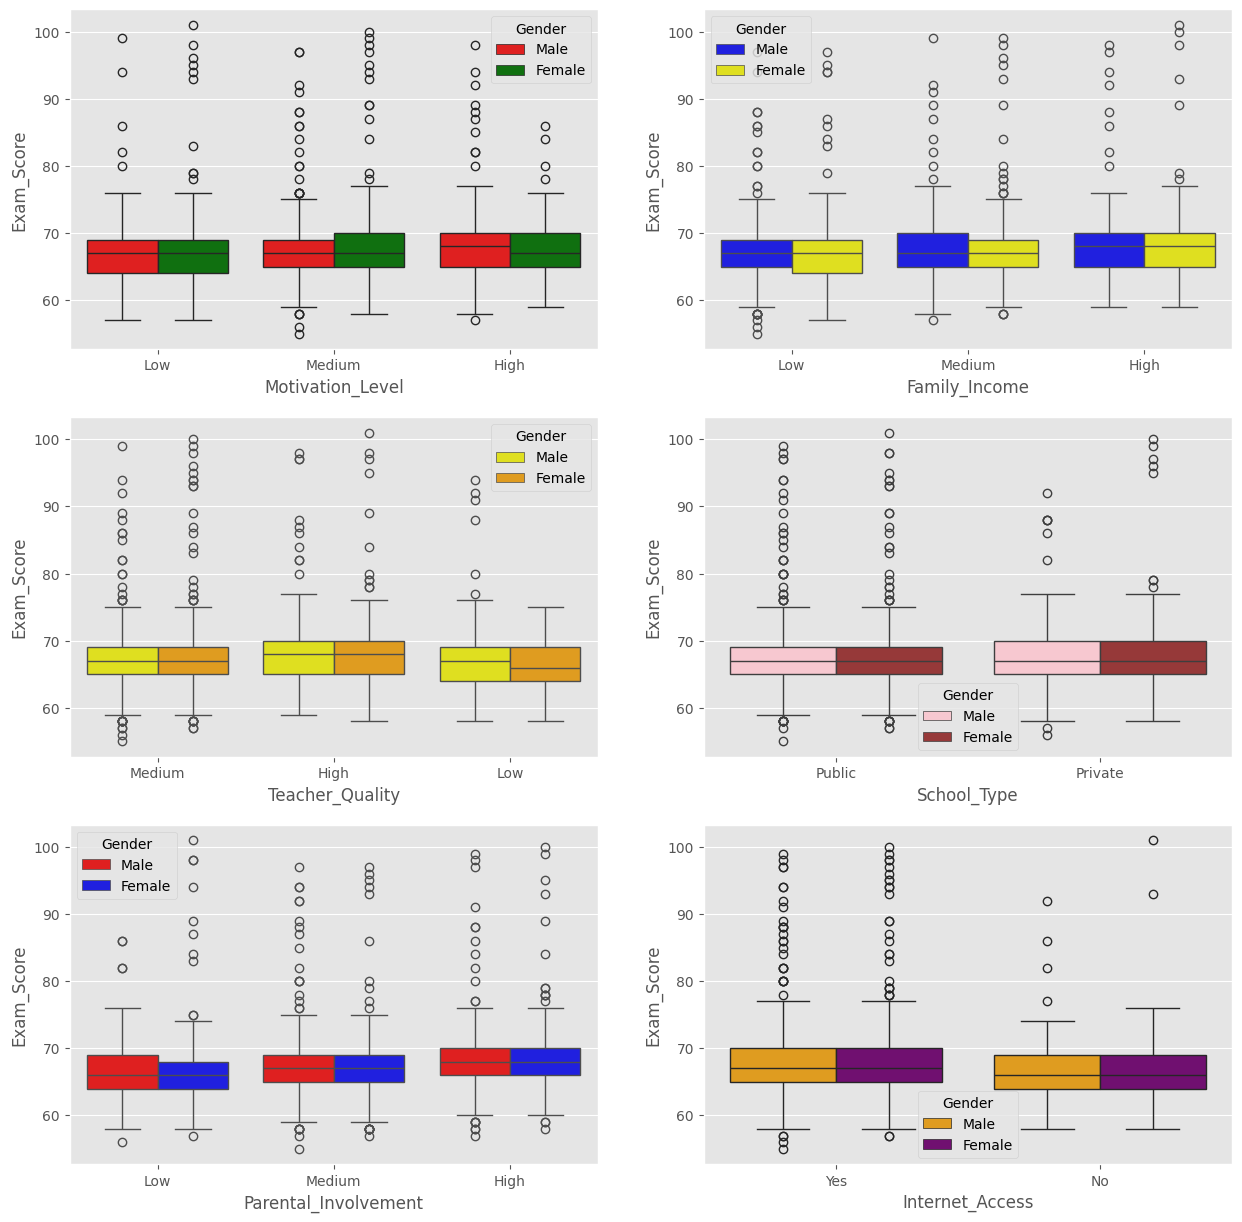

In [83]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(x='Motivation_Level', y='Exam_Score', ax=ax1, data=students, hue='Gender', palette=['red', 'green'])
sns.boxplot(x='Family_Income', y='Exam_Score', ax=ax2, data=students, hue='Gender', palette=['blue', 'yellow'])
sns.boxplot(x='Teacher_Quality', y='Exam_Score', ax=ax3, data=students, hue='Gender', palette=['yellow', 'orange'])
sns.boxplot(x='School_Type', y='Exam_Score', ax=ax4, data=students, hue='Gender', palette=['pink', 'brown'])
sns.boxplot(x='Parental_Involvement', y='Exam_Score', ax=ax5, data=students, hue='Gender', palette=['red', 'blue'])
sns.boxplot(x='Internet_Access', y='Exam_Score', ax=ax6, data=students, hue='Gender', palette=['orange', 'purple'])
plt.savefig("../assets/plots/relationship-between-categorical-numerical-features.png", dpi=300, bbox_inches="tight")

### Relationship between Categorical Features and Categorical Features

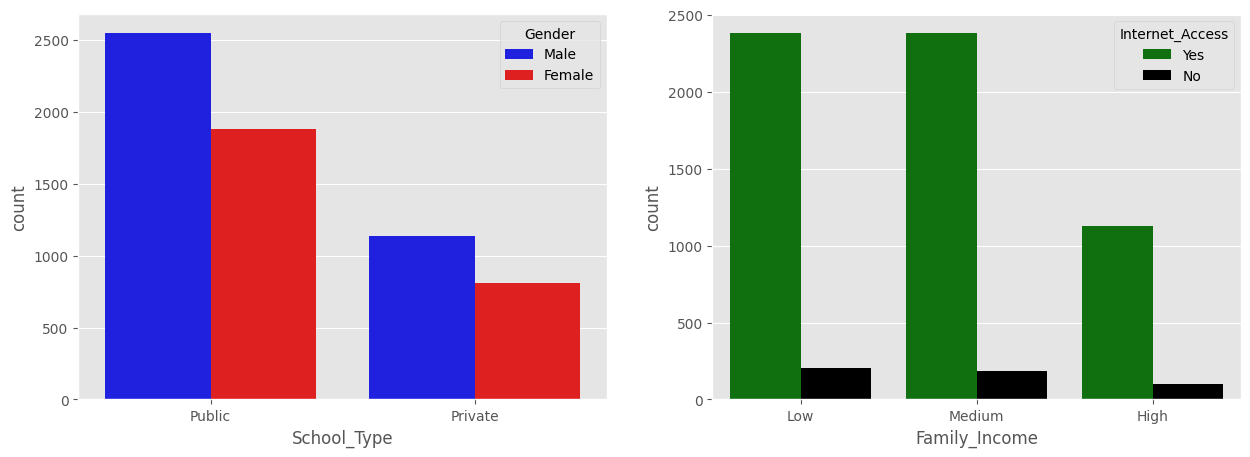

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='School_Type', hue='Gender', data=students, ax=ax1, palette=['blue', 'red'])
sns.countplot(x='Family_Income', hue='Internet_Access', data=students, ax=ax2, palette=['green', 'black'])
plt.savefig("../assets/plots/relationship-between-categorical-categorical-features.png", dpi=300, bbox_inches="tight")

In [85]:
students = students.select_dtypes(exclude='object')

In [86]:
students.shape

(6378, 20)

In [87]:
students.to_csv("../data/processed/clean_data.csv", index=False)

# Exploratory Data Analysis – Key Conclusions

## Data Overview & Cleaning
- The dataset contains **6607 student records** with a mix of numerical and categorical features.
- Missing values were present in categorical features such as **Teacher_Quality**, **Parental_Education_Level**, and **Distance_from_Home**.
- For consistency and reliable analysis, rows with missing values were removed before deeper exploration.
- After cleaning, the dataset was suitable for statistical analysis and modeling.

---

## Distribution Analysis (Univariate Analysis)

### Numerical Features
- **Hours_Studied** follows an approximately **normal distribution**, indicating most students study around the average number of hours.
- **Attendance** and **Previous_Scores** do **not follow a perfect normal distribution**, suggesting variation in student discipline and academic background.
- **Sleep_Hours** peaks at around **7 hours**, which aligns with healthy sleep recommendations.
- **Physical_Activity** is mostly concentrated around **2–3 hours**, showing moderate activity levels.
- **Tutoring_Sessions** is highly right-skewed, with most students attending **1 session**.
- **Exam_Score** shows a near-normal distribution, making it suitable as a regression target variable.

---

## Outlier Detection
- Using the **IQR method**:
  - **Hours_Studied** contains **43 outliers**, likely representing extremely low or high study hours.
  - **Tutoring_Sessions** contains **430 outliers**, indicating that a small group of students attends unusually high tutoring sessions.
- These outliers reflect **realistic student behavior** and were not removed, as they may hold predictive value.

---

## Answering Key Analytical Questions asked

### How do sleep hours affect student performance?
- Correlation analysis shows a **weak to moderate positive relationship** between **Sleep_Hours** and **Exam_Score**.
- Students who sleep adequately tend to perform slightly better, but sleep alone is not a strong predictor.

---

### How does physical activity affect student performance?
- **Physical_Activity** has a **low positive correlation** with exam scores.
- Moderate physical activity may support performance indirectly (better health, focus), but it is not a dominant factor.

---

### How do tutoring sessions and hours studied contribute to performance?
- **Hours_Studied** shows a **strong positive correlation** with **Exam_Score**, making it one of the most important predictors.
- **Tutoring_Sessions** also positively impacts performance, but the effect is **weaker than self-study hours**.
- This suggests **consistent self-study is more impactful than excessive tutoring**.

---

### How do access to resources, internet access, and motivation affect performance?
- **Access_to_Resources** and **Internet_Access** show a **positive relationship** with exam scores.
- **Motivation_Level** exhibits a **noticeable positive correlation**, highlighting its importance in academic success.
- Students with better resources and higher motivation generally perform better.

---

### How do family and social factors affect performance?
- **Parental_Involvement** shows a **positive influence** on exam scores.
- **Peer_Influence** indicates that students with positive peer groups tend to score higher.
- **Distance_from_Home** has a slight negative impact, suggesting long commutes may affect performance.

---

## Categorical Feature Insights

- **Gender** distribution is fairly balanced; correlation with exam score is minimal, indicating **no strong gender bias**.
- Students from **Private schools** slightly outperform those from Public schools on average.
- Higher **Teacher_Quality** is associated with better exam scores.
- Students from **High-income families** generally score higher, likely due to better access to resources.

---

## Relationship Analysis

### Numerical vs Numerical
- Strong relationship observed between:
  - **Hours_Studied ↔ Exam_Score**
  - **Previous_Scores ↔ Exam_Score**
- Weak relationships observed with sleep and physical activity.

### Categorical vs Numerical
- **Motivation_Level**, **Family_Income**, and **Parental_Involvement** show clear differences in score distributions.
- Gender-based variations exist but are not significant.

### Categorical vs Categorical
- **School_Type vs Gender** shows balanced representation.
- **Family_Income vs Internet_Access** indicates higher-income families have better internet access.

---

## Final EDA Summary
- **Academic effort (Hours_Studied, Previous_Scores)** is the strongest driver of student performance.
- **Socio-economic and motivational factors** play an important supporting role.
- **Lifestyle factors** (sleep, physical activity) contribute marginally but positively.
- The dataset is well-structured and suitable for **regression-based modeling**, justifying the use of machine learning models for prediction.

---

These insights guided feature selection, preprocessing, and model building in later stages of the project.